In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import scipy.special as spc
from sklearn.linear_model import LogisticRegression

In [5]:
def bootstrap_1d(samples, mu, B=1000, plot=True, fnc=np.mean):
    mu_hat = fnc(samples)
    mu_boot = np.zeros(shape=(B,))
    for b in range(B):
        bootstrap_samples = rnd.choice(samples, N)
        mu_boot[b] = fnc(bootstrap_samples)
    if plot:
        low = np.min(mu_boot)
        high = np.max(mu_boot)
        length = high - low
        low, high = low - 0.1 * length, high + 0.1 * length
        plt.hist(mu_boot, bins=np.arange(low, high, 0.05 * length))
        plt.axvline(mu_hat, color='r', linestyle='dashed', linewidth=3)
        plt.axvline(mu, color='g', linestyle='dashed', linewidth=3)
        plt.show()
    return mu_boot

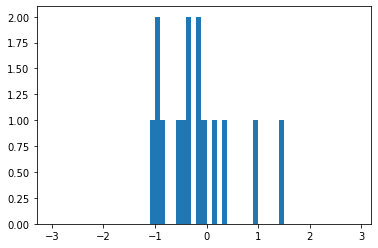

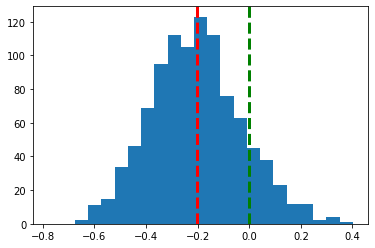

In [18]:
# Mean estimation
# 1: Gaussian
mu = 0.0
sigma = 1.0
N = 15
samples = rnd.normal(mu, sigma, N)
plt.hist(samples, bins=np.arange(-3, 3, .1))
plt.show()
mu_boot = bootstrap_1d(samples, mu, fnc=np.mean)
#print('Estimated stdev: %.3f' % np.std(mu_boot))
#print('True stdev: %.3f' % (sigma / np.sqrt(N)))

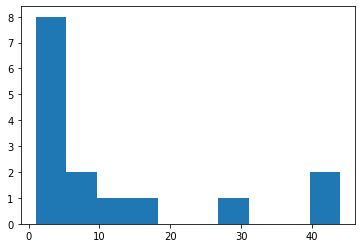

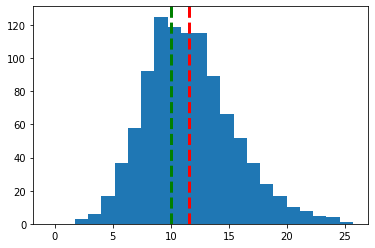

Estimated stdev (bootstrap): 3.798
Estimated stdev (simple) 3.715
True stdev: 2.449


In [30]:
# 2: Geometric
r = 0.1
N = 15
samples = rnd.geometric(r, N)
plt.hist(samples)
plt.show()
mu_boot = bootstrap_1d(samples, 1.0/r)
print('Estimated stdev (bootstrap): %.3f' % np.std(mu_boot))
print('Estimated stdev (simple) %.3f' % (np.std(samples) / np.sqrt(N-1)))
print('True stdev: %.3f' % ((np.sqrt(1-r)/r) / np.sqrt(N)))

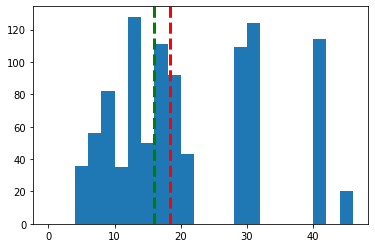

In [31]:
samples_large = rnd.geometric(r, 10000)
#fnc = np.median
#bootstrap_1d(samples, fnc(samples_large), fnc=fnc)
fnc = lambda x : np.quantile(x, 0.8)
bootstrap_1d(samples, fnc(samples_large), fnc=fnc);

In [32]:
def logistic_regression(X, y):
    return LogisticRegression(solver='lbfgs', fit_intercept=False).fit(X, y).coef_[0]


def bootstrap_xy(X, y, w=None, B=1000, fnc=logistic_regression, plot=True):
    d = X.shape[1]
    w_hat = fnc(X, y)
    w_boot = np.zeros(shape=(B,d))
    for b in range(B):
        bootstrap_indices = rnd.choice(np.arange(N), N)
        bootstrap_X = X[bootstrap_indices, :]
        bootstrap_y = y[bootstrap_indices]
        w_boot[b,:] = fnc(bootstrap_X, bootstrap_y)
    if plot:
        plt.scatter(w_boot[:,0], w_boot[:,1], c='b')
        plt.scatter(w_hat[0], w_hat[1], c='r', marker='x', s=300)
        plt.scatter(w[0], w[1], c='g', marker='x', s=300)
        plt.show()
    return mu_boot

[ 1  2 -1 -2  1  1  1  1  1  1]
[ 0.78768228  1.35909291 -0.92526155 -1.61445279  1.47999611  0.75620377
  0.92931631  0.24206559  0.77395568  0.7293759 ]


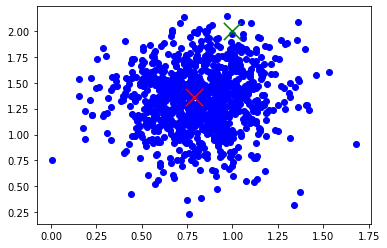

In [56]:
N = 100
d = 10
sigmoid = spc.expit
#w = np.array([2, -1])
w = np.array([1, 2, -1, -2, 1, 1, 1, 1, 1, 1])
X = rnd.randn(N,d)
z = np.sum(X*w, 1)
y = rnd.binomial(1, sigmoid(z))
w_hat = logistic_regression(X, y)
print(w)
print(w_hat)
bootstrap_xy(X, y, w, B=1000);